In [29]:
import ast
import bs4
import time
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
df = pd.read_csv('CSVs/clean_df.csv')

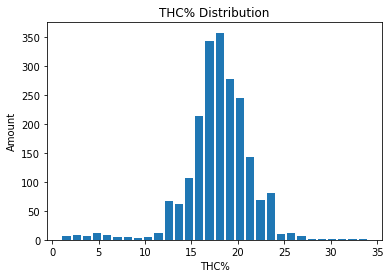

In [3]:
## THC % Distribution ##

df['THC'].hist(bins=30,rwidth=0.8,grid=False)
plt.xlabel('THC%')
plt.ylabel('Amount')
plt.title('THC% Distribution')

plt.show()

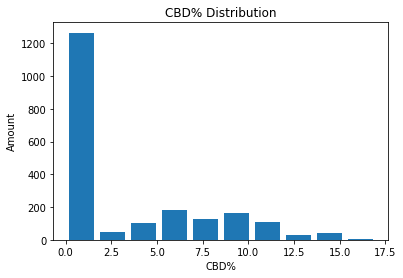

In [69]:
## THC % Distribution ##

df['CBD'].hist(bins=10,rwidth=0.8,grid=False)
plt.xlabel('CBD%')
plt.ylabel('Amount')
plt.title('CBD% Distribution')

plt.show()

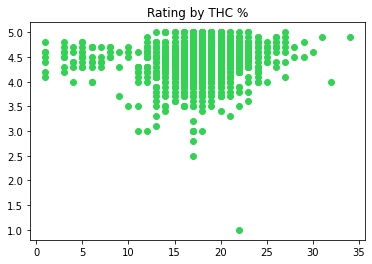

In [31]:
## Strain rating by THC % ##

fig = plt.figure()
ax =plt.axes()

ax.scatter(df.THC,df.Rating,color='#32D352')
plt.title("Rating by THC %")

plt.show()

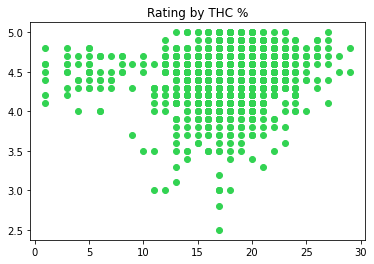

In [27]:
## Outliers cleaning ##
## Based on the above scatter plot we can see we have 1 strain that has low rating, as well as couple strains that have over 30% THC ##

df = df[(df['Rating'] > 1.5) & (df['THC'] < 30)]

fig = plt.figure()
ax =plt.axes()

ax.scatter(df.THC,df.Rating,color='#32D352')
plt.title("Rating by THC %")

plt.show()

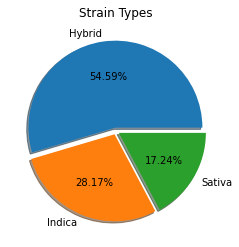

In [20]:
## Strain types in our data ##

most_freq1 = df['Type'].value_counts()
explode = (0.04, 0.04, 0.04)
most_freq1.plot(kind='pie',autopct='%1.2f%%',shadow=True,explode=explode,ylabel='')
plt.title('Strain Types')

plt.show()


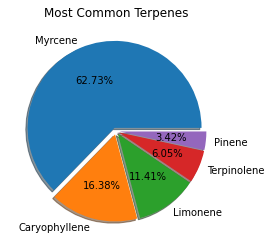

In [21]:
## Most common terpenes ##

most_freq1 = df['Top Terpene'].value_counts().head(5)
explode = (0.04, 0.04, 0.04, 0.04, 0.04)

most_freq1.plot(kind='pie',autopct='%1.2f%%',shadow=True,explode=explode,ylabel='')
plt.title('Most Common Terpenes')

plt.show()


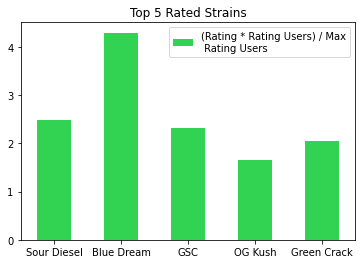

In [22]:
## Top 5 rated strains ##

top_rated_strains = df.copy()
max_rating_users = top_rated_strains['Rating Users'].max()

top_rated_strains['Overall Rating'] = (top_rated_strains['Rating'] * top_rated_strains['Rating Users']) / max_rating_users ## Normalize rating

top_rating = top_rated_strains['Overall Rating'].nlargest()
values = top_rating.values.tolist()
top_rated = top_rated_strains[(top_rated_strains['Overall Rating'] == values[0]) | (top_rated_strains['Overall Rating'] == values[1]) | (top_rated_strains['Overall Rating'] == values[2]) | (top_rated_strains['Overall Rating'] == values[3]) | (top_rated_strains['Overall Rating'] == values[4])]


top_rated = top_rated[['Strain Name','Overall Rating']].set_index('Strain Name',drop=True)

ax =plt.axes()
top_rated.plot(kind='bar',xlabel='',color='#32D352',ax=ax,rot=0)
plt.legend(['(Rating * Rating Users) / Max\n Rating Users'])
plt.title('Top 5 Rated Strains')

plt.show()


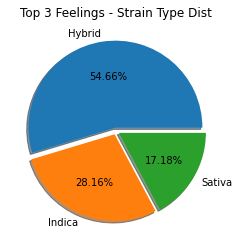

In [61]:
## Top 3 feelings distribution between the strain types ##

feelings = (df['Feeling_1'].value_counts() + df['Feeling_2'].value_counts() + df['Feeling_3'].value_counts() + df['Feeling_4'].value_counts() + df['Feeling_5'].value_counts())

feeling_1 = feelings.nlargest(3).index[0]
feeling_2 = feelings.nlargest(3).index[1]
feeling_3 = feelings.nlargest(3).index[2]

top_feelings = df[((df['Feeling_1'] == feeling_1) | (df['Feeling_2'] == feeling_1) | (df['Feeling_3'] == feeling_1) | (df['Feeling_4'] == feeling_1) | (df['Feeling_5'] == feeling_1) | (df['Feeling_1'] == feeling_2) | (df['Feeling_2'] == feeling_2) | (df['Feeling_3'] == feeling_2) | (df['Feeling_4'] == feeling_2) | (df['Feeling_5'] == feeling_2) | (df['Feeling_1'] == feeling_3) | (df['Feeling_2'] == feeling_3) | (df['Feeling_3'] == feeling_3) | (df['Feeling_4'] == feeling_3) | (df['Feeling_5'] == feeling_3))]

most_freq1 = top_feelings['Type'].value_counts()
explode = (0.04, 0.04, 0.04)
most_freq1.plot(kind='pie',autopct='%1.2f%%',shadow=True,explode=explode,ylabel='')
plt.title('Top 3 Feelings - Strain Type Dist')


plt.show()


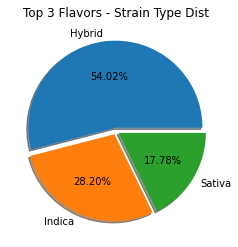

In [59]:
## Top 3 flavors distribution between the strain types ##

flavors = (df['Flavor_1'].value_counts() + df['Flavor_2'].value_counts() + df['Flavor_3'].value_counts())

flavor_1 = flavors.nlargest(3).index[0]
flavor_2 = flavors.nlargest(3).index[1]
flavor_3 = flavors.nlargest(3).index[2]

top_feelings = df[(df['Flavor_1'] == flavor_1) | (df['Flavor_2'] == flavor_1) |(df['Flavor_3'] == flavor_1) | (df['Flavor_1'] == flavor_2) |(df['Flavor_3'] == flavor_2) |(df['Flavor_3'] == flavor_2) |(df['Flavor_1'] == flavor_3) |(df['Flavor_2'] == flavor_3) |(df['Flavor_3'] == flavor_3)]

most_freq1 = top_feelings['Type'].value_counts()
explode = (0.04, 0.04, 0.04)
most_freq1.plot(kind='pie',autopct='%1.2f%%',shadow=True,explode=explode,ylabel='')
plt.title('Top 3 Flavors - Strain Type Dist')


plt.show()


In [71]:
df = df.loc[:,~df.columns.str.match("Unnamed")]

df.to_csv('CSVs/clean_df(post EDA).csv')